In [59]:
# import packages you will be using

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [4]:
# bring in the data

df = pd.read_csv(r'/Users/mollygorman/Downloads/Pokemon_data.csv')


In [6]:
df.head()

,pokedex_number,name,generation,classfication,abilities,height_m,weight_kg,type1,type2,base_total,...,against_psychic,against_rock,against_steel,against_water,capture_rate,base_egg_steps,base_happiness,is_legendary,is_mythical,is_mega
0,1,Bulbasaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",0.7,6.9,Grass,Poison,318,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,0
1,2,Ivysaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",1.0,13.0,Grass,Poison,405,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,0
2,3,Venusaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",2.0,100.0,Grass,Poison,525,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,0
3,3,Mega Venusaur,1,Seed Pokemon,['Thick Fat'],2.4,155.5,Grass,Poison,625,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,1
4,4,Charmander,1,Lizard Pokemon,"['Blaze', 'Solar Power']",0.6,8.5,Fire,None,309,...,1.0,2.0,0.5,2.0,45,"5,140",70.0,0,0,0


In [7]:
# checking the data set to see if there is any missing information

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)*100))

pokedex_number - 0%
name - 0%
generation - 0%
classfication - 0%
abilities - 0%
height_m - 0%
weight_kg - 0%
type1 - 0%
type2 - 0%
base_total - 0%
hp - 0%
attack - 0%
defense - 0%
sp_attack - 0%
sp_defense - 0%
speed - 0%
against_bug - 0%
against_dark - 0%
against_dragon - 0%
against_electric - 0%
against_fairy - 0%
against_fighting - 0%
against_fire - 0%
against_flying - 0%
against_ghost - 0%
against_grass - 0%
against_ground - 0%
against_ice - 0%
against_normal - 0%
against_poison - 0%
against_psychic - 0%
against_rock - 0%
against_steel - 0%
against_water - 0%
capture_rate - 0%
base_egg_steps - 0%
base_happiness - 0%
is_legendary - 0%
is_mythical - 0%
is_mega - 0%


In [11]:
df.dtypes


pokedex_number        int64
name                 object
generation            int64
classfication        object
abilities            object
height_m            float64
weight_kg           float64
type1                object
type2                object
base_total            int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
against_bug         float64
against_dark        float64
against_dragon      float64
against_electric    float64
against_fairy       float64
against_fighting    float64
against_fire        float64
against_flying      float64
against_ghost       float64
against_grass       float64
against_ground      float64
against_ice         float64
against_normal      float64
against_poison      float64
against_psychic     float64
against_rock        float64
against_steel       float64
against_water       float64
capture_rate         object
base_egg_steps      

In [32]:
# edit
import pandas as pd
import numpy as np

# Replace non-numeric values with NaN
df['capture_rate'] = pd.to_numeric(df['capture_rate'], errors='coerce')

# Check for missing values
print(df.isnull().sum())


pokedex_number       0
name                 0
generation           0
classfication        0
abilities            0
height_m             0
weight_kg            0
type1                0
type2                0
base_total           0
hp                   0
attack               0
defense              0
sp_attack            0
sp_defense           0
speed                0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fighting     0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
capture_rate        10
base_egg_steps       9
base_happiness       9
is_legendary         0
is_mythical          0
is_mega              0
dtype: int64


In [34]:
# now I will remove the missing values

df = df.dropna()

print(df.isnull().sum())

pokedex_number      0
name                0
generation          0
classfication       0
abilities           0
height_m            0
weight_kg           0
type1               0
type2               0
base_total          0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
against_bug         0
against_dark        0
against_dragon      0
against_electric    0
against_fairy       0
against_fighting    0
against_fire        0
against_flying      0
against_ghost       0
against_grass       0
against_ground      0
against_ice         0
against_normal      0
against_poison      0
against_psychic     0
against_rock        0
against_steel       0
against_water       0
capture_rate        0
base_egg_steps      0
base_happiness      0
is_legendary        0
is_mythical         0
is_mega             0
dtype: int64


In [13]:
# for this data set I want to figure out which Pokemon would make the best first companion

# I will base this off capture rate, base happiness and size

In [39]:
# First I want to start by filtering the Pokemon who fall in my idea of a small to medium size
# 2kg - 30kg

small_medium_df = df[(df['weight_kg'] >= 2) & (df['weight_kg'] <= 30)]

In [45]:
# I will check which pokemon have the highest base level of happiness, they will be easier to take care of 

top_happiest = small_medium_df.nlargest(25, 'base_happiness').reset_index() # finding the top 25
happiest = top_happiest[['name', 'base_happiness', 'type1' ]] # adding name and type
print(happiest)


                        name  base_happiness     type1
0                   Clefairy           140.0     Fairy
1                     Cleffa           140.0     Fairy
2               Mega Lopunny           140.0    Normal
3                    Happiny           140.0    Normal
4              Indeedee Male           140.0   Psychic
5            Indeedee Female           140.0   Psychic
6                        Mew           100.0   Psychic
7                     Celebi           100.0   Psychic
8                  Pachirisu           100.0  Electric
9                    Ambipom           100.0    Normal
10                  Croagunk           100.0    Poison
11        Shaymin Land Forme           100.0     Grass
12         Shaymin Sky Forme           100.0     Grass
13                   Victini           100.0   Psychic
14       Meloetta Aria Forme           100.0    Normal
15  Meloetta Pirouette Forme           100.0    Normal
16            Hoopa Confined           100.0   Psychic
17        

In [ ]:
# I now want to check which pokemon are the easiest to catch

In [46]:
easiest_catch = small_medium_df.nlargest(25, 'capture_rate').reset_index() # finding the top 25
easiest = easiest_catch[['name', 'capture_rate', 'type1']] # including the pokemons name and type
print(easiest)

                  name  capture_rate   type1
0             Caterpie         255.0     Bug
1               Weedle         255.0     Bug
2              Rattata         255.0  Normal
3       Alolan Rattata         255.0    Dark
4              Spearow         255.0  Normal
5                Ekans         255.0  Poison
6            Sandshrew         255.0  Ground
7                Zubat         255.0  Poison
8               Oddish         255.0   Grass
9               Meowth         255.0  Normal
10       Alolan Meowth         255.0    Dark
11             Poliwag         255.0   Water
12          Bellsprout         255.0   Grass
13             Geodude         255.0    Rock
14      Alolan Geodude         255.0    Rock
15            Magikarp         255.0   Water
16             Sentret         255.0  Normal
17            Hoothoot         255.0  Normal
18              Ledyba         255.0     Bug
19            Spinarak         255.0     Bug
20              Wooper         255.0   Water
21        

In [48]:
# I am going to use a venn diagram to see if there are any commonalities between the 2

In [49]:
# first I'll install the program

!pip install matplotlib_venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=2afcb987beb899ec061f9b3bfee2a74176480ad286dc295eab2d46654e243b50
  Stored in directory: /Users/mollygorman/Library/Caches/pip/wheels/ab/a1/93/9cbd4e11e6964009387cd595450dfcbb6998e15dfbaa5805dd
Successfully built matplotlib_venn


In [60]:
import pandas as pd
from matplotlib_venn import venn2

In [61]:
happiest_unique = set(happiest['name'])
easiest_unique = set(easiest['name'])

In [62]:
intersection = happiest_unique.intersection(easiest_unique)

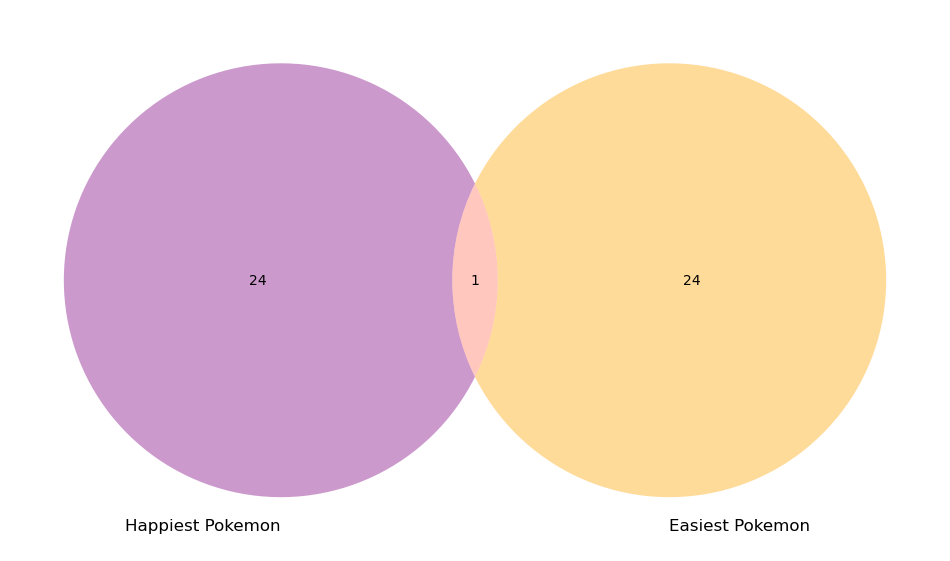

In [66]:
venn2([happiest_unique, easiest_unique], ('Happiest Pokemon', 'Easiest Pokemon'), set_colors=('purple', 'orange'))

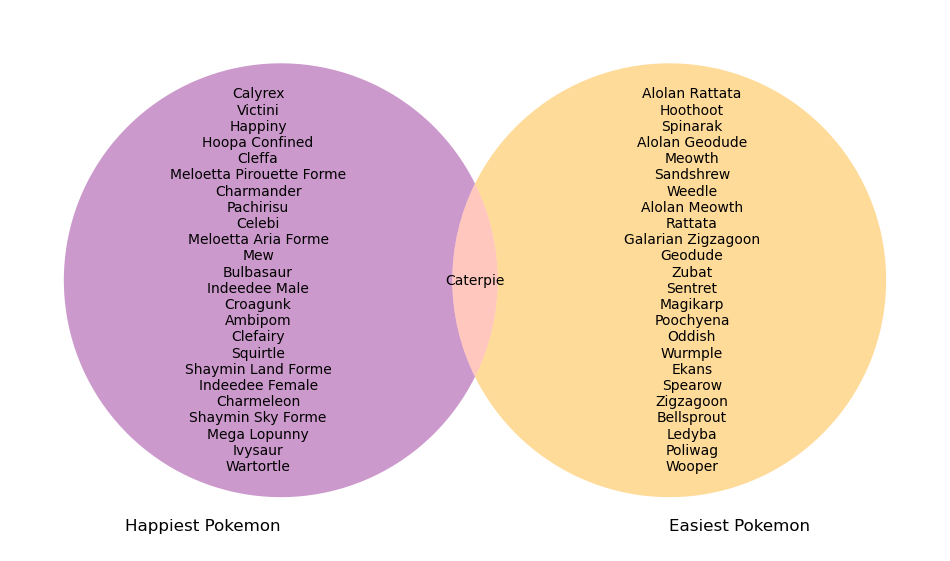

In [67]:
# this looks nice but I am missing one thing, the names, I'll include that now 

import matplotlib.pyplot as plt
from matplotlib_venn import venn2


happiest_unique = set(happiest['name'])
easiest_unique = set(easiest['name'])
intersection = happiest_unique.intersection(easiest_unique)

# Plot a Venn diagram to visualize the commonalities
venn = venn2([happiest_unique, easiest_unique], ('Happiest Pokemon', 'Easiest Pokemon'), set_colors=('purple', 'orange'))

# Set text labels for each section of the diagram
venn.get_label_by_id('10').set_text('\n'.join(happiest_unique - intersection))
venn.get_label_by_id('01').set_text('\n'.join(easiest_unique - intersection))
venn.get_label_by_id('11').set_text('\n'.join(intersection))


plt.show()


In [ ]:
# Interestingly enough there is exactly one Pokemon, Caterpie that will be the best the first companion.

![caterpie](https://user-images.githubusercontent.com/118074280/235577888-1f99e8b6-7b18-4d32-ac52-a4808cf6f672.png)
